Modelos de regresión
===

* *10:00 min* | Última modificación: Abril 5, 2021 | [YouTube]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Datasets utilizados

In [2]:
tips = sns.load_dataset("tips")

display(
    tips.head(),
    tips.tail(),
    tips.size,
)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


1708

In [3]:
anscombe = sns.load_dataset("anscombe")

display(
    anscombe.head(),
    anscombe.tail(),
    anscombe.size,
)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


132

## Modelos de regresión lineal

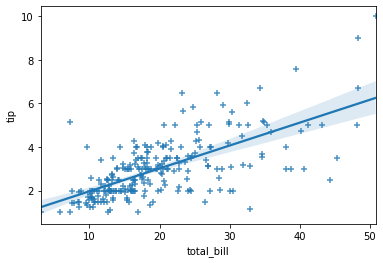

In [4]:
#
# Regresión univariada con intervalos de
# confianza del 95% usando regplot().
#
sns.regplot(
    x="total_bill",
    y="tip",
    data=tips,
    marker='+',
)

plt.show()

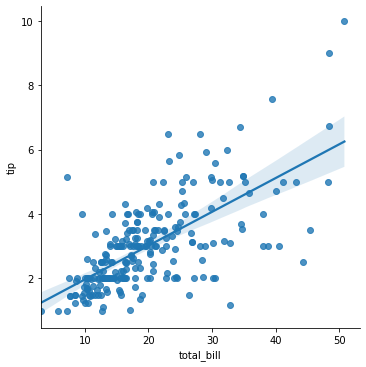

In [5]:
#
# Gráfica equivalente usando lmplot()
#
sns.lmplot(
    x="total_bill",
    y="tip",
    data=tips,
    x_jitter=0.05,
)

plt.show()

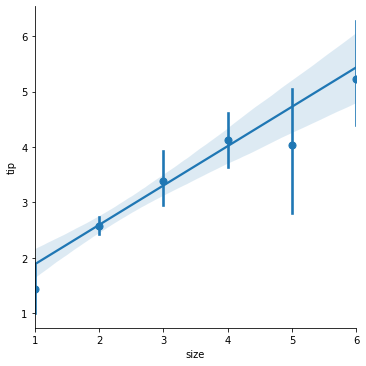

In [6]:
#
# Visualización de los datos como un intervalo
#
sns.lmplot(
    x="size",
    y="tip",
    data=tips,
    x_estimator=np.mean,
)

plt.show()

## Ajuset de diferentes tipos de modelos

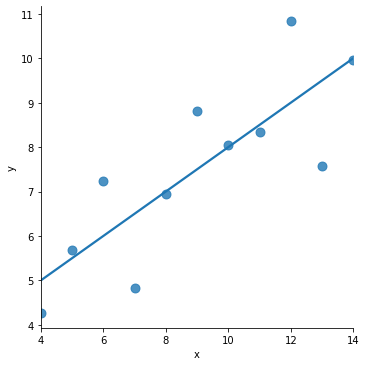

In [7]:
#
# Ajuste para uno de los subconjuntos de datos
# usando un modelo lineal.
#
sns.lmplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'I'"),
    ci=None,
    scatter_kws={"s": 80},
)

plt.show()

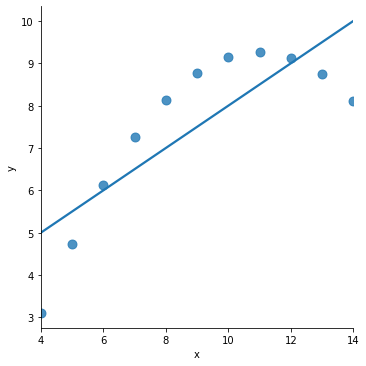

In [8]:
#
# Ajuste para el otro subconjunto de datos usando
# un modelo lineal.
#
sns.lmplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'II'"),
    ci=None,
    scatter_kws={"s": 80},
)

plt.show()

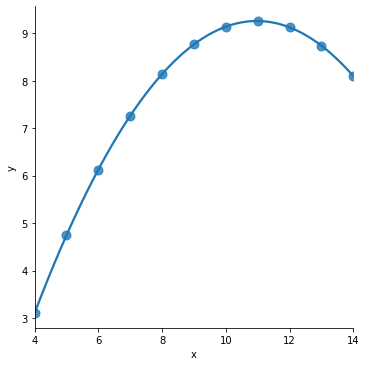

In [9]:
#
# AJuste usando un polinomio de grado 2.
#
sns.lmplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'II'"),
    order=2,
    ci=None,
    scatter_kws={"s": 80},
)

plt.show()

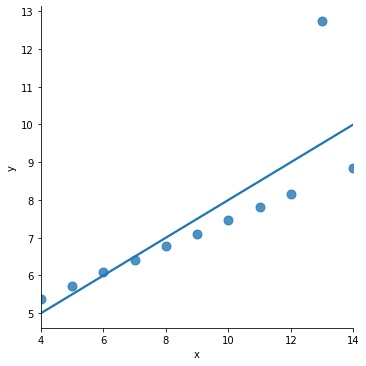

In [10]:
#
# Ajuste en presencia de outliers.
#
sns.lmplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'III'"),
    ci=None,
    scatter_kws={"s": 80},
)

plt.show()

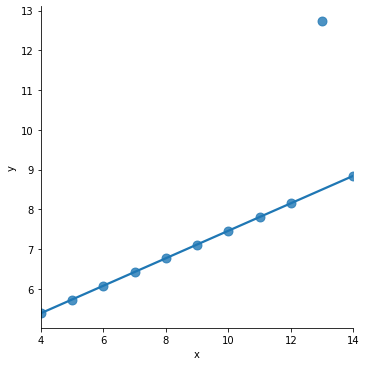

In [11]:
#
# Regresión robusta. Requiere statsmodels.
#
sns.lmplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'III'"),
    robust=True,
    ci=None,
    scatter_kws={"s": 80},
)

plt.show()

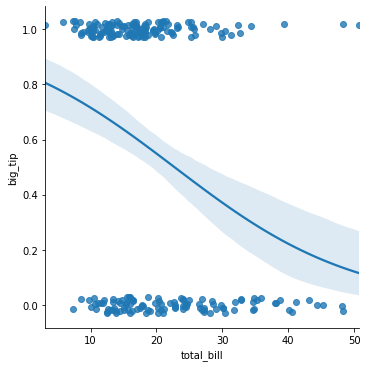

In [12]:
#
# Regresión logística.
#
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

sns.lmplot(
    x="total_bill",
    y="big_tip",
    data=tips,
    logistic=True,
    y_jitter=0.03,
)

plt.show()

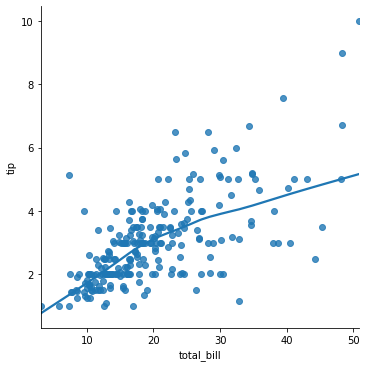

In [13]:
#
# Regresión usando lowless
#
sns.lmplot(
    x="total_bill",
    y="tip",
    data=tips,
    lowess=True,
)

plt.show()

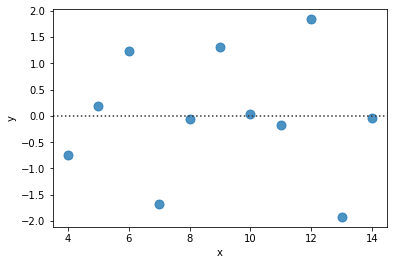

In [14]:
#
# Gráfico de residuos del modelo
#
sns.residplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'I'"),
    scatter_kws={"s": 80},
)

plt.show()

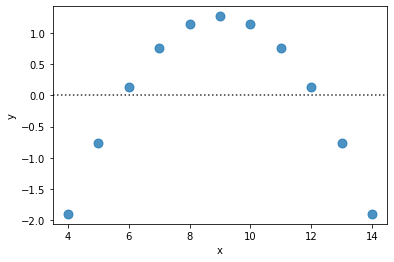

In [15]:
#
# Residuos con estructura
#
sns.residplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'II'"),
    scatter_kws={"s": 80},
)

plt.show()

## Regresión por categoría

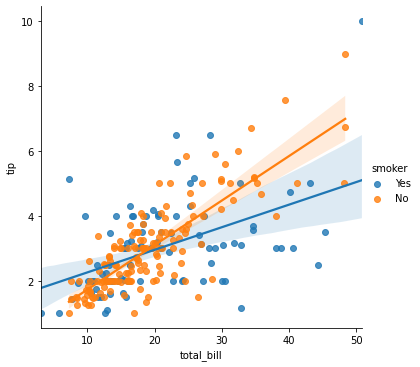

In [16]:
#
# Las series usan el mismo marcador
#
sns.lmplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    data=tips,
)

plt.show()

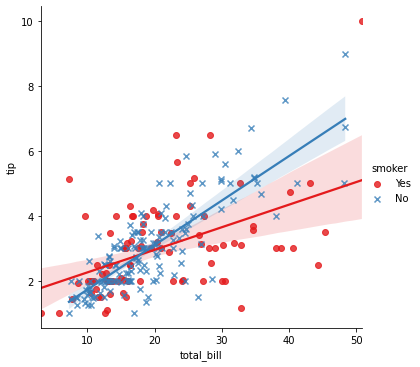

In [17]:
#
# Marcador diferente para cada serie
#
sns.lmplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    data=tips,
    markers=["o", "x"],
    palette="Set1",
)

plt.show()

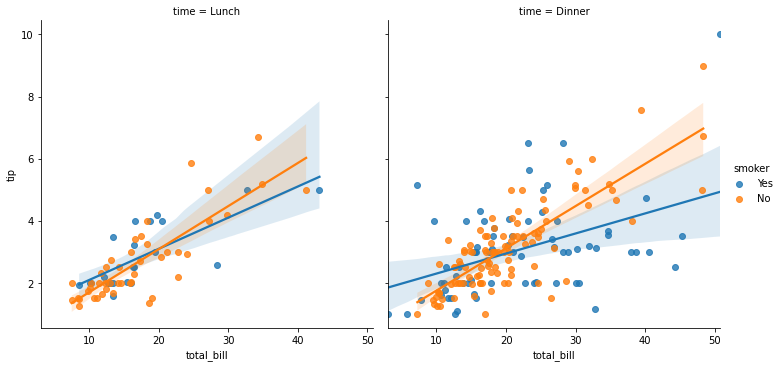

In [18]:
#
# Separación en columnas
#
sns.lmplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    col="time",
    data=tips,
)

plt.show()

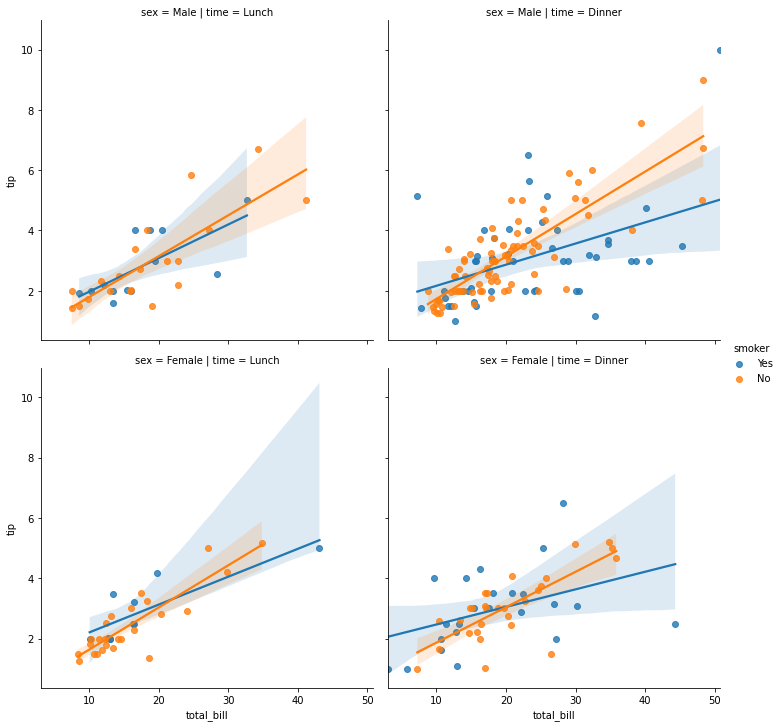

In [19]:
#
# Separación en filas y columnas
#
sns.lmplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    col="time",
    row="sex",
    data=tips,
)

plt.show()

## Formato de la figura

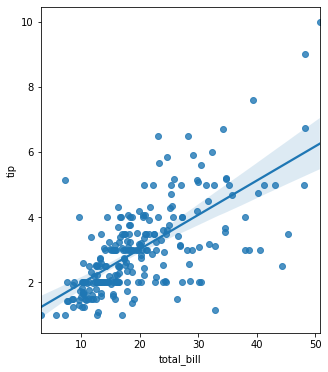

In [20]:
#
# Tamaño
#
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(
    x="total_bill",
    y="tip",
    data=tips,
    ax=ax,
)
plt.show()

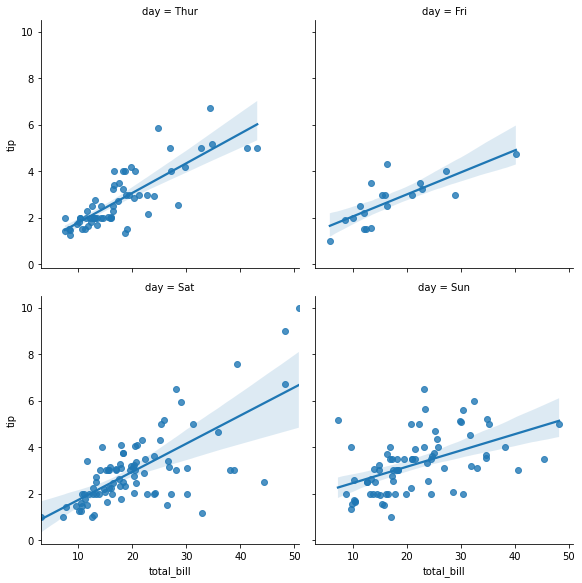

In [21]:
#
# Número fijo de columnas
#
sns.lmplot(
    x="total_bill",
    y="tip",
    col="day",
    data=tips,
    col_wrap=2,
    height=4,
)

plt.show()

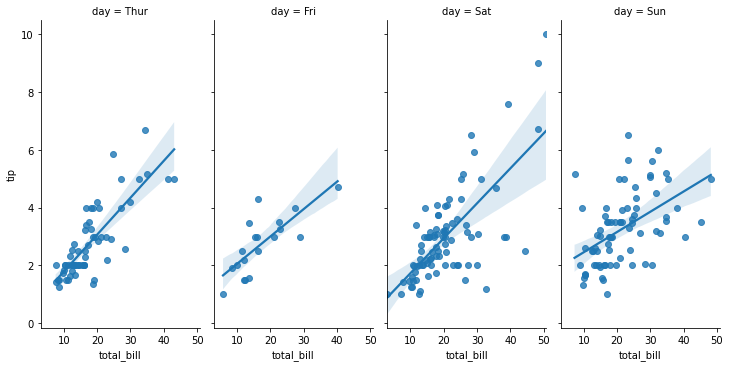

In [22]:
#
# Relación de aspecto de la gráfica
#
sns.lmplot(
    x="total_bill",
    y="tip",
    col="day",
    data=tips,
    aspect=0.5,
)

plt.show()

## Regresión con otros tipos de gráficos

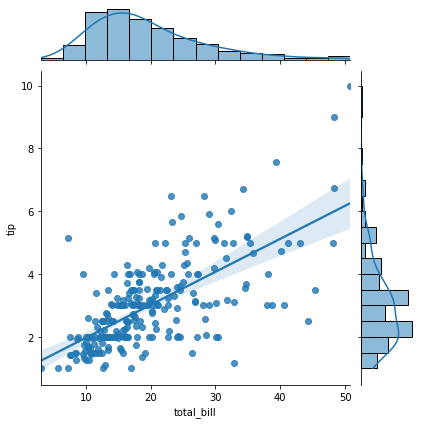

In [23]:
#
# Uso de joinplot()
#
sns.jointplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="reg",
)

plt.show()

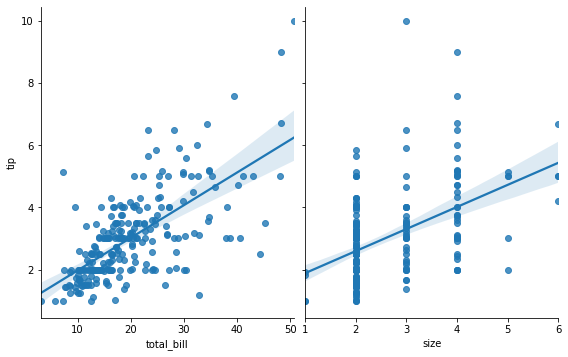

In [24]:
#
# Uso de pairplot()
#
sns.pairplot(
    tips,
    x_vars=["total_bill", "size"],
    y_vars=["tip"],
    height=5,
    aspect=0.8,
    kind="reg",
)

plt.show()

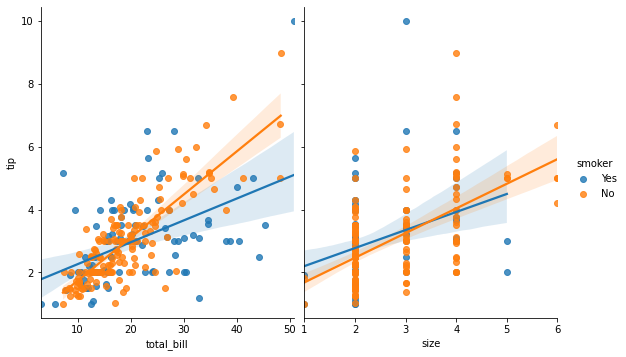

In [25]:
sns.pairplot(
    tips,
    x_vars=["total_bill", "size"],
    y_vars=["tip"],
    hue="smoker",
    height=5,
    aspect=0.8,
    kind="reg",
)

plt.show()